#Logistic regression

In [1]:
#importin dataset
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [3]:
df = df[df['target']!=2]
df['target'].value_counts()

target
0    50
1    50
Name: count, dtype: int64

In [4]:
x = df.drop('target',axis=1)
y = df['target']

In [5]:
#splitting the dataset in training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 10)

In [6]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

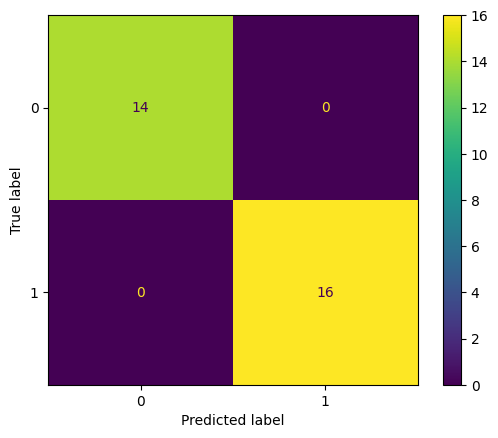

In [7]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm_diplay = ConfusionMatrixDisplay(cm)
cm_diplay.plot()

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Error :",1-accuracy_score(y_test,y_pred))

Accuracy : 1.0
Error : 0.0


In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_prob)
auc = roc_auc_score(y_test,y_prob)
print("AUC : ",auc)

AUC :  1.0


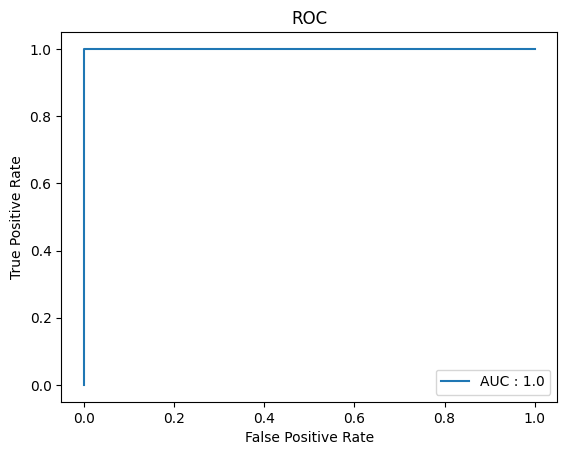

In [73]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="AUC : "+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [74]:
from sklearn.model_selection import KFold,cross_val_score

kfold = KFold(5,shuffle=True,random_state=10)
cv_mean_accuracy = cross_val_score(model,x,y,cv=kfold,scoring='accuracy').mean()

print("Cross validation mean accuracy :",cv_mean_accuracy)

Cross validation mean accuracy : 1.0
